# LAZ2PCD using Automating Coordinate System Transformation
## code Description:
- input could be in eaither laz or las point cloud format (cuurent version works with laz files as input)
- the output is pcd format
- changing CoordinateReferenceSystem of the original file is optional and can be done using this code

# how to use the code:

1. create a folder with the name <b>data</b> in your workspace root
2. create a folder with the name <b>original</b> in the data folder and put all the laz files that you need to convert in it

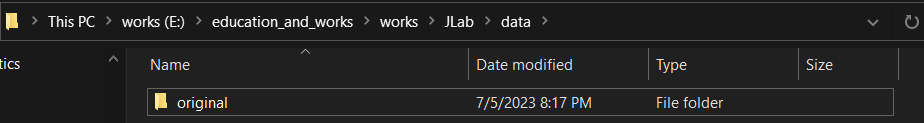

3. run the cells

## after running the codes

1. decompressed las files will be stored in a folder named <b>decompressed</b> in <b>./data/decommpressed</b>
2. pcd files will be stored in a folder named <b>PCD</b> in <b>./data/PCD</b>

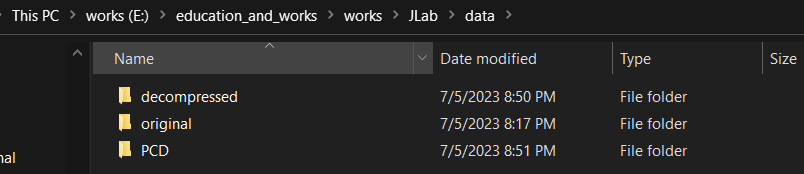

## notes:

1. code will automatically scroll the whole content in the <b>original</b> folder and extracts the <b>.laz</b> files. so, make sure all the laz files in original folder are stored without any sub-foldering like below
2. the proccess is memory consuming depends on the size of the laz files. so, make sure your system has enough memory. 12GB available memory is enough for las files that each has maximum 10GB size.

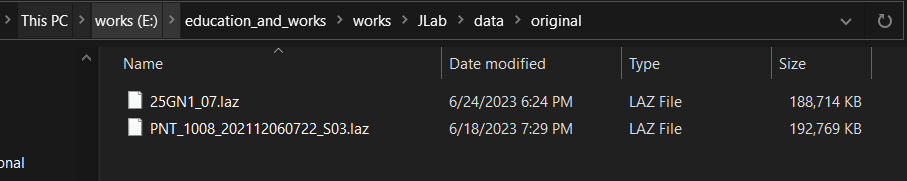

In [10]:
!pip install open3d

Traceback (most recent call last):
  File "C:\Users\Hamidreza\AppData\Local\Programs\Python\Python38-32\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Hamidreza\AppData\Local\Programs\Python\Python38-32\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "E:\education_and_works\works\JLab\Laz2Pcd\venv\Scripts\pip.exe\__main__.py", line 4, in <module>
ModuleNotFoundError: No module named 'pip'


In [4]:
!pip install laspy
!pip install laszip
!pip install pyproj
!pip install open3d
!pip install utm
!pip install PyGeodesy

You should consider upgrading via the 'E:\education_and_works\works\JLab\Laz2Pcd\venv\Scripts\python.exe -m pip install --upgrade pip' command.



  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for laspy: filename=laspy-2.5.3-py3-none-any.whl size=84526 sha256=03970b1f8e0b2789eec995cf14c96b3fd4fb85237597c3522899783795893019
  Stored in directory: c:\users\hamidreza\appdata\local\pip\cache\wheels\ac\28\f4\674e495d50260d806c8512007ac6b10be7e8647710594c43b9
Successfully built laspy
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished wi

  ERROR: Command errored out with exit status 1:
   command: 'E:\education_and_works\works\JLab\Laz2Pcd\venv\Scripts\python.exe' 'E:\education_and_works\works\JLab\Laz2Pcd\venv\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\HAMIDR~1\AppData\Local\Temp\tmp3jqy8wyb'
       cwd: C:\Users\Hamidreza\AppData\Local\Temp\pip-install-enio8ws7\laszip_d191344350164c6f92520d00716073a6
  Complete output (66 lines):
  running bdist_wheel
  running build
  running build_ext
  CMake Warning:
    Ignoring extra path from command line:
  
     "C:\Users\Hamidreza\AppData\Local\Temp\pip-install-enio8ws7\laszip_d191344350164c6f92520d00716073a6"
  
  
  CMake Error: The source directory "C:/Users/Hamidreza/AppData/Local/Temp/pip-install-enio8ws7/laszip_d191344350164c6f92520d00716073a6" does not appear to contain CMakeLists.txt.
  Specify --help for usage, or press the help button on the CMake GUI.
  Traceback (most recent call last):
    File "E:\education_and_works\w

  Using cached certifi-2023.11.17-py3-none-any.whl (162 kB)


You should consider upgrading via the 'E:\education_and_works\works\JLab\Laz2Pcd\venv\Scripts\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement open3d (from versions: none)
ERROR: No matching distribution found for open3d
You should consider upgrading via the 'E:\education_and_works\works\JLab\Laz2Pcd\venv\Scripts\python.exe -m pip install --upgrade pip' command.


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6108 sha256=5415ffbb369aab1ac0d08378a64ef69ea477e62cc705c02212f8fde49a5122cf
  Stored in directory: c:\users\hamidreza\appdata\local\pip\cache\wheels\65\e2\d8\878a8cc986641056fbfebefc4d8eb64238a7b6d3426e86b447
Successfully built utm


You should consider upgrading via the 'E:\education_and_works\works\JLab\Laz2Pcd\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'E:\education_and_works\works\JLab\Laz2Pcd\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
import numpy as np
import laspy
import laszip as lzip
import pyproj
import os
import math
import open3d as o3d
import csv
from pygeodesy import Epsg, epsg, toUtmUps8, Utm
from utm import from_latlon

ModuleNotFoundError: No module named 'open3d'

# display information

In [2]:
def las_info(las_file):
    with laspy.open(las_file, mode="r") as f:
        # version
        print(f"LAS version: {f.header.version}")

        print(f.header.vlrs)

        # RGB
        point_format = f.header.point_format
        has_rgb = "red" in point_format.dimension_names and "green" in point_format.dimension_names and "blue" in point_format.dimension_names
        if has_rgb:
            print("The LAS file contains RGB data.")
        else:
            print("The LAS file does not contain RGB data.")

        # Access other attributes
        print("Point count:", f.header.point_count)

        print("Scale:", f.header.scale)
        print("Offset:", f.header.offset)
        print("longitude upper and lower bound", f.header.x_max, f.header.x_min)
        print("latitude upper and lower bound", f.header.y_max, f.header.y_min)
        print("altitude upper and lower bound", f.header.z_max, f.header.z_min)

        point_format = f.header.point_format
        for dimension in point_format.dimensions:
            if dimension.name == "X" or dimension.name == "Y" or dimension.name == "Z":
                print(dimension.name, "-", dimension.dtype, "-", "is-scaled:", dimension.is_scaled, "-", "scales:", dimension.scales, "-", "offsets:", dimension.offsets)
            else:
                print(dimension.name, "-", dimension.dtype)
    
def pcd_info(pcd_file):
    intensity = True
    
    # Read the PCD file
    pcd = o3d.io.read_point_cloud(pcd_file)

    # Print the point cloud information
    print(pcd)
    print("Number of points:", len(pcd.points))
    print("Point cloud dimension:", pcd.dimension())
    print("Point cloud has colors:", pcd.has_colors())
    if pcd.has_colors():
        print("Point cloud colors:", pcd.colors)
    print("Point cloud geometry type:", pcd.get_geometry_type())
    print("Point cloud max bound:", pcd.get_max_bound())
    print("Point cloud min bound:", pcd.get_min_bound())
    print("Point cloud XYZ bounds:", pcd.get_axis_aligned_bounding_box().get_extent())
    print("examle of points:")
    print("       X             Y              Z")
    print(np.asarray(pcd.points)[:4])
    
def displaPcdPointsFloat64(pcd_file):
    # Read the PCD file
    with open(pcd_file, "rb") as file:
        # Skip the header lines
        for _ in range(11):
            file.readline()

        # Read the binary data
        binary_data = file.read()

    # Interpret the binary data as float64
    num_points = len(binary_data) // (8 * 4)  # Each point has 4 float64 values (x, y, z, intensity)
    print(len(binary_data) // (8 * 4) )
    xyzi = np.frombuffer(binary_data, dtype=np.float64).reshape(num_points, 4)
    print(xyzi)
    

def get_file_size_mb(file_path):  
    # Get the size of the file in bytes
    file_size_bytes = os.path.getsize(file_path)
    # Convert bytes to megabytes
    file_size_mb = file_size_bytes / (1024 * 1024)
    return file_size_mb

    

# laz2pcd 

In [3]:
# gobal variables
# TODO: toMgrs = True # if True latlon to MGRS, if False latlon to UTM
doPartitioning = False   # if False laz to single corresponding las, if True laz to multiple splitted las files
toPcd = True   # if True las2pcd, if False las2csv
automaticPartitioning = False

In [4]:
def makePartition(folder_name, original_folder, original_file, number_of_sub_files):
    """
    split the orginal file into multiple files

    Args:
        original_folder (str): Path to the folder containing the original laz files.
        output_directory (str): Path to the output directory for saving the decompressed files.
        number_of_sub_files (int): specifies the number of sub-files to create from the original laz file.

    Returns:
        None
    """
    with laspy.open(os.path.join(original_folder, original_file), mode="r") as in_file:
        original_header = in_file.header
        total_points = in_file.header.point_count
        points_per_file = math.ceil(total_points / number_of_sub_files)  # Number of points per LAS file
        num_files = math.ceil(total_points / points_per_file)
        remaining_points = total_points

        # Read the points for the current file
        las = in_file.read()
        for subfile_idx in range(num_files):
            num_points = min(points_per_file, remaining_points)
            points = las.points[subfile_idx * points_per_file: subfile_idx * points_per_file + num_points]

            # Create a new LAS file for the points in the output folder
            output_file_name = os.path.join(folder_name, f"{os.path.splitext(original_file)[0]}_{subfile_idx+1:02}.las")

            output_file = laspy.LasData(las.header)
            output_file.points = points
            output_file.write(output_file_name)

            print(f"File {subfile_idx + 1} / {num_files} saved to {output_file_name}")

            remaining_points -= num_points
            if remaining_points == 0:
                break
            
            
def copyLazToLas(original_folder, original_file, folder_name):
    """
    copy contents of a laz file into a single las file

    Args:
        original_folder (str): Path to the folder containing the original laz files.
        original_file (str): name of the laz file
        folder_name (str): Path to the folder stores the converted las file

    Returns:
        None
    """
    # If partitioning is not needed, just copy the original LAZ file to the output folder
    las_file = os.path.join(original_folder, original_file)
    las = laspy.read(las_file)
    output_file_name = os.path.join(folder_name, f"{os.path.splitext(original_file)[0]}.las")
    las.write(output_file_name)
    print(f"File copied to {output_file_name}")
    

def lazToLas(original_folder="./data/original", output_directory="./data/decompressed", number_of_sub_files=2):
    """
    Decompresses LAZ files to LAS files and optionally splits them into multiple LAS files.

    Args:
        original_folder (str): Path to the folder containing the original laz files.
        output_directory (str): Path to the output directory for saving the decompressed files.
        number_of_sub_files (int): specifies the number of las sub-files to create from the original laz file.

    Returns:
        None
    """
    # Get the list of original laz files in the original folder
    original_files = [f for f in os.listdir(original_folder) if f.endswith(".laz")]

   # Define a custom sorting key
    def custom_sort_key(filename):
        parts = filename.split("_")
        first_number = int(parts[1])  # First numeric value
        second_number = int(parts[2])  # Second numeric value
        third_number = parts[3].split(".")[0][1:]  # Third numeric value
        return (first_number, second_number, third_number)

    # Sort the list of filenames using the custom sorting key
    sorted_files = sorted(original_files, key=custom_sort_key)
    # Create the output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    # Iterate over each original laz file
    for file_idx, original_file in enumerate(sorted_files):
        # Create the output folder for the current main file
        print(file_idx, original_file)    
        folder_name = os.path.join(output_directory, str(file_idx+1).zfill(2))
        print(folder_name)
        os.makedirs(folder_name, exist_ok=True)
        
        if automaticPartitioning:
            # Get the size of the file in bytes
            file_size = get_file_size_mb(original_folder + "/" + original_file)
            makePartition(folder_name, original_folder, original_file, (file_size // 250) + 1)
            
        else:
            if doPartitioning:
                makePartition(folder_name, original_folder, original_file, number_of_sub_files)

            else:
                copyLazToLas(original_folder, original_file, folder_name)
                

In [5]:
class Points:
    def __init__(self):
        self.x = None
        self.y = None
        self.z = None
    
    def set_values(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        

def getIntensity(las_file):
    """
    Extracts the intensity values of a LAS file.

    Args:
        las_file (str): Path to the LAS file.

    Returns:
        ndarray: Array of scalar values representing the intensity values.
    """
    las = laspy.read(las_file)
    intensity_values = np.array(las.intensity)
    return intensity_values


def normalizeIntensity(input_list):
    """
    Normalize a list of integers to the range 0-255.

    Parameters:
    input_list (list): List of integers to be normalized (intensity values).

    Returns:
    list: A new list with the normalized values in the range 0-255.
    """
    min_value = min(input_list)
    max_value = max(input_list)
    normalized_list = []
    for value in input_list:
        normalized_value = np.float32(((value - min_value) / (max_value - min_value)) * 255)
        normalized_list.append(normalized_value)
    
    return normalized_list

    
def getZone(las_file):
    """
    Get the MGRS information based on the first point in a LAS file.

    Parameters:
    las_file (str): The path to the LAS file.

    Returns:
    str: MGRS information in the format "zone-band-en100k" the result is like 54SVE that contains of (54, S, VE).
    """

    las = laspy.read(las_file)
    x = las.x
    y = las.y

    # Convert coordinates to UTM/UPS zone
    utm = toUtmUps8(y[0], x[0])
    # Convert UTM/UPS to MGRS
    mgrs = utm.toMgrs()

    # Combine zone, band, and en100k to form the result
    return "{}{}{}".format(mgrs.zone, mgrs.band, mgrs.en100k)


    
def _toMgrs(x, y, z, points_count):
    """
    transport longlat to MGRS
    
    Args:
        x (np.array): Array of X coordinates in longitude.
        y (np.array): Array of Y coordinates in latitude.
        z (np.array): Array of Z coordinates in altitude.
        points_count (int): number of points in las file
    
    Returns:
        Points Object: Transformed coordinates (x, y, z) in the MGRS format.
    """
    mgrs = Points()
    eastings = []
    northings = []
    elevation = []
    for i in range(points_count):
        utm = from_latlon(y[i], x[i])
        easting, northing, _, _ = utm
        easting = np.float32(easting - int(easting / 100000) * 100000)
        northing = np.float32(northing - int(northing / 100000) * 100000)
        ele = np.float32(z[i])
        elevation.append(ele)
        eastings.append(easting)
        northings.append(northing)
    mgrs.set_values(eastings, northings, elevation)
    return mgrs
    
    
def _toUtm(x, y, z, points_count):
    """
    transform geographic longlat values to projected UTM X,Y values

    Args:
        x (np.array): Array of X coordinates in longitude.
        y (np.array): Array of Y coordinates in latitude.
        z (np.array): Array of Z coordinates in altitude.
        points_count (int): number of points in las file

    Returns:
        Points Object: Transformed coordinates (x, y, z) in the MGRS format.
    """
    new_points = Points()
    eastings = []
    northings = []
    elevation = []
    for i in range(points_count):
        utm = from_latlon(y[i], x[i])
        easting, northing, _, _ = utm
        ele = np.float32(z[i])
        elevation.append(ele)
        eastings.append(easting)
        northings.append(northing)
    new_points.set_values(eastings, northings, elevation)
    return new_points


def split(x, y, point_count):
    """
    Split two lists x and y into multiple smaller lists.
    
    Args:
        x (list): The first list to be split.
        y (list): The second list to be split.
        point_count (int): number of points in the original file
        
    Returns:
        tuple: A tuple containing two lists of smaller splits for x and y.
    """
    # Calculate the size of each smaller list
    number_of_splits = 5
    split_size = point_count // number_of_splits
    remainder = point_count % number_of_splits
    print("split method")
    print(point_count, split_size, remainder)

    # Initialize variables
    X_splits = []
    Y_splits = []
    start = 0

    # Split the original list into 5 smaller lists
    for i in range(number_of_splits):
        end = start + split_size
        if i == number_of_splits - 1:
            end += remainder
        X_splits.append(x[start:end])
        Y_splits.append(y[start:end])
        start = end
    
    return X_splits, Y_splits


def change_CRS(x, y, z, current_CRS, target_crs):
    """
    Changes the Coordinate Reference System (CRS) of the given coordinates.
    
    
    1. currentCRS = 6668 ---> targetCRS = 6677
    2. currentCRS = 6677 ---> targetCRS = 32654
    
        EPSG:6668: LL-JGD2011-ITRF08, longlat.
            Name:	JGD2011
            Datum:	Japanese_Geodetic_Datum_2011
            Type:	Geographic
        EPSG:6677: MGRS, X,Y
            Name:	JGD2011 / Japan Plane Rectangular CS IX
            Datum:	Japanese_Geodetic_Datum_2011
            Type:	Projected
        EPSG:32654: WGS 84
            Name:	WGS 84 / UTM zone 54N
            Datum:	WGS_1984
            Type:	Projected

    Args:
        x (ndarray): Array of scaled x-coordinates.
        y (ndarray): Array of scaled y-coordinates.
        z (ndarray): Array of scaled z-coordinates.
        current_CRS (int): a number reperesenting EPSG code of the current CRS
        target_crs (int): a number reperesenting EPSG code of the target CRS
        
    Returns:
        Tuple: Transformed coordinates (x, y, z) in the target CRS.
    """
    src_crs = pyproj.CRS.from_epsg(current_CRS)
    tgt_crs = pyproj.CRS.from_epsg(target_crs)
    transformer = pyproj.Transformer.from_crs(src_crs, tgt_crs, always_xy=True)
    X_splits, Y_splits = split(x, y, len(x))
    
    output_x = []
    output_y = []
    print("----------------------------------")
    for i in range(len(X_splits)):
        x = X_splits[i]
        y = Y_splits[i]
        print(i, len(x), len(y))
        
        transformed_points = transformer.transform(x, y)
        x, y = transformed_points
        x = np.array(x)
        y = np.array(y)
        
        x_mgrs = np.float32(x - np.floor(x / 100000) * 100000)
        output_x.extend(x_mgrs)
        y_mgrs = np.float32(y - np.floor(y / 100000) * 100000)
        output_y.extend(y_mgrs)
    z = np.float32(z)
    
    return output_x,output_y,z



In [6]:
def lasToCsv(las_file, csv_folder):
    """
    Transforms a LAS file to a CSV file and saves it.

    Args:
        las_file (str): Path to the input LAS file.
        csv_folder (str): Path to the folder where the CSV file will be saved.

    Returns:
        None
    """
    # Read the LAS file
    las = laspy.read(las_file) 
    x = las.x
    y = las.y
    z = las.z

    # CRS transformation
    new_points = Points()
    new_points = _toMgrs(x, y, z, las.header.point_count)
    intensities = normalizeIntensity(getIntensity(las_file))
    
    # data rows of csv file 
    fields = ['x', 'y', 'z', 'i'] 
    rows = [[x, y, z, i] for x, y, z, i in zip(new_points.x, new_points.y, new_points.z, intensities)]
    
    # name of csv file 
    csv_file_name = os.path.splitext(os.path.basename(las_file))[0] + ".csv"
    csv_file_name = getZone(las_file) + "_" + csv_file_name
    csv_file = os.path.join(csv_folder, csv_file_name)

    # writing to csv file 
    with open(csv_file, 'w') as csvfile: 
        # creating a csv writer object 
        csvwriter = csv.writer(csvfile) 
        # writing the fields 
        csvwriter.writerow(fields) 
        # writing the data rows 
        csvwriter.writerows(rows)
    
    print(f"Saved {csv_file}")
    
    
def savePcd(data, pcd_file, num_points):
    # Save the points as a PCD file in xyzi format (binary)
    with open(pcd_file, "wb") as file:
        # Write the PCD header
        header = "# .PCD v0.7 - Point Cloud Data file format\n"  # This is a comment line that indicates the version and file format.
        header += "VERSION 0.7\n"  # Specifies the PCD file format version.
        header += "FIELDS x y z intensity\n"  # Specifies the field names for each dimension of the point cloud. In this case, it includes the x, y, z, and intensity fields.
        header += "SIZE 4 4 4 4\n"  # Specifies the size (in bytes) of each field. Since the fields x, y, z, and intensity are all represented as single-precision floating-point values (float32), their size is 4 bytes each.
        header += "TYPE F F F F\n"  # Specifies the data type for each field. In this case, all fields are represented as single-precision floating-point values.
        header += "COUNT 1 1 1 1\n"  #Specifies the number of values per field. Since each field has a single value, the count is set to 1 for all fields.
        header += "WIDTH {}\n".format(num_points)  # Specifies the total number of points in the point cloud. This value is provided by the num_points variable in the code.
        header += "HEIGHT 1\n"  # Specifies the height of the point cloud (usually set to 1 for 2D point clouds).
        header += "VIEWPOINT 0 0 0 1 0 0 0\n"  # Specifies the viewpoint or sensor position of the point cloud.
        header += "POINTS {}\n".format(num_points)  # : Specifies the total number of points in the point cloud. This value is provided by the num_points variable in the code.
        header += "DATA binary\n"  # Indicates that the point cloud data will be stored in binary format.

        file.write(header.encode())
        # Convert the points to the required dtype (float32)
        data = data.astype(np.float32)
        # Write the points in binary format
        data.tofile(file)
    
    print(f"Saved {pcd_file}")

                    
def lasToPcd(las_file, pcd_folder):
    """
    Transforms a LAS file to a PCD file and saves it.

    Args:
        las_file (str): Path to the input LAS file.
        pcd_folder (str): Path to the folder where the PCD file will be saved.

    Returns:
        None
    """
    # Read the LAS file
    las = laspy.read(las_file) 
    x = las.x
    y = las.y
    z = las.z
    
    # CRS transformation
    new_points = Points()
    x, y, z = change_CRS(x, y, z, 6668, 32654)
    new_points.set_values(x, y ,z)
    
    # gather all the information needed to make a pcd file
    points_list = [(x, y, z) for x, y, z in zip(new_points.x, new_points.y, new_points.z)]
    
    intensities = normalizeIntensity(getIntensity(las_file))
    num_points = len(points_list)
        
    xyzi = np.column_stack((points_list, intensities))
    
    # Save the point cloud as a PCD file
    pcd_file_name = os.path.splitext(os.path.basename(las_file))[0] + ".pcd"
    pcd_file_name = getZone(las_file) + "_" + pcd_file_name
    pcd_file = os.path.join(pcd_folder, pcd_file_name)
    
    savePcd(xyzi, pcd_file, num_points)
    

def processDecompressedFolder(decompressed_folder, pcd_folder, csv_folder):
    """
    Processes the decompressed folder containing LAS files and converts them to PCD or CSV format.

    Args:
        decompressed_folder (str): Path to the decompressed folder.
        pcd_folder (str): Path to the output PCD folder.
        csv_folder (str): Path to the output CSV folder
        convertToPcd (global bool): Flag indicating whether to convert to PCD or CSV

    Returns:
        None
    """
    print("decompressed folder: ", decompressed_folder)
    i = 0
        # Get a sorted list of subdirectory names
    for folder_name, _, filenames in sorted(os.walk(decompressed_folder)):
        print(i)
        i+=1
        print("folder_name:", folder_name)
        print("filenames: ", filenames)
        if filenames:
            folder_number = os.path.basename(folder_name)
            print("folder_number: ", folder_number)
            if toPcd: 
                _subfolder = os.path.join(pcd_folder, folder_number)
#                 _subfolder = pcd_folder
            else:
                _subfolder = os.path.join(csv_folder, folder_number)
            
            print("subfolder; ", _subfolder)
                
            os.makedirs(_subfolder, exist_ok=True)
            for filename in filenames:
                if filename.endswith(".las"):
                    las_file = os.path.join(folder_name, filename)
                    if toPcd:
                        print("las file, _subfolder: ", las_file, _subfolder)
                        lasToPcd(las_file, _subfolder)
                    else:
                        lasToCsv(las_file, _subfolder)

In [7]:
def main():
    
    # defining the path of the stored laz files and where to store las and pcd files
    original_folder = "./data/original"
    decompressed_folder = "./data/decompressed"
    pcd_folder = "./data/PCD"
    csv_folder = "./data/CSV"
    
    # decompress laz to las
    print(f"decompressing laz files from {original_folder} to {decompressed_folder} started ...")
#     lazToLas(original_folder, decompressed_folder)
    print("decompressing ended successfully.")

    # convert las to pcd
    os.makedirs(pcd_folder, exist_ok=True)
    if toPcd:
        print("converting las to pcd started ...")
    else:
        print("converting las to csv started ...")
    processDecompressedFolder(decompressed_folder, pcd_folder, csv_folder) #set the last value True if you want to change the CRS
    print("Conversion completed successfully.")

In [9]:
%%time
if __name__ == "__main__":
    main()

decompressing laz files from ./data/original to ./data/decompressed started ...
decompressing ended successfully.
converting las to pcd started ...
decompressed folder:  ./data/decompressed
0
folder_name: ./data/decompressed
filenames:  []
1
folder_name: ./data/decompressed\03
filenames:  ['PNT_1008_202112060722_S03.las']
folder_number:  03
subfolder;  ./data/PCD\03
las file, _subfolder:  ./data/decompressed\03\PNT_1008_202112060722_S03.las ./data/PCD\03
split method
57749907 11549981 2
----------------------------------
0 11549981 11549981
1 11549981 11549981
2 11549981 11549981
3 11549981 11549981
4 11549983 11549983
Saved ./data/PCD\03\54SVE_PNT_1008_202112060722_S03.pcd
Conversion completed successfully.
CPU times: total: 2min 59s
Wall time: 6min 7s


## visualising pcd file

In [4]:
pcd = o3d.io.read_point_cloud()
o3d.visualization.draw_geometries([pcd])

## display las and pcd file info

In [ ]:
pcd_info()

In [ ]:
las_info()

In [21]:
648.74 // 250

2.0